# Let's make a heatmap

First, we're going to need geographic data. Open Street Map is a fantastic repository of it, maintained by a community 
of volunteers and free to use. We'll use a python wrapper to the Overpass API.

In [54]:
%matplotlib inline
import overpass
api = overpass.API()

_TODO: intro overpass API_

Okay, let's get some data! In order to satiate my addiction to caffeine, I'm going to request all the coffeeshops in the city of Seattle. To make things easy I'm just going to hardcode the latitude and longitude into the text of the query; these can easily be found by clicking on a point of Google Maps, or if you're using Open Street Maps, by right-clicking and selecting Show Address. 

In [32]:
response = api.Get('node["amenity"="cafe"](47.5, -122.436, 47.734, -122.235);')
seattle_cafes = []
for feature in response['features']:
    if 'name' in feature['properties']:
        seattle_cafes.append((feature['properties']['name'], *feature['geometry']['coordinates']))

In [146]:
from pandas import DataFrame
df = DataFrame.from_records(sorted(seattle_cafes), columns=["name", "lon", "lat"])
df

,name,lon,lat
0,3.14 Bakery & Coffee,-122.354960,47.517178
1,3rd Ave Cafe,-122.339931,47.612024
2,701 Coffee,-122.302936,47.608155
3,72nd Street Café,-122.325448,47.680479
4,A Muddy Cup,-122.325240,47.661416
5,Ada's Technical Books and Cafe,-122.312893,47.622687
6,Admiral Bird Cafe,-122.386350,47.581056
7,Alison’s Coastal Cafe & Bakery,-122.382517,47.667274
8,All City Coffee,-122.317113,47.549020
9,Allegro Coffee,-122.376516,47.636961


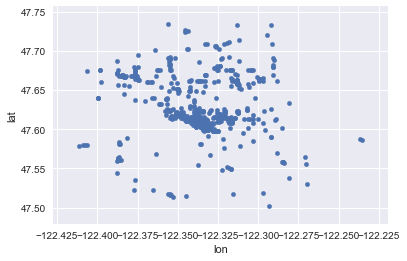

In [147]:
import matplotlib.pyplot as plt
df.plot.scatter(x='lon', y='lat')

With the scatterplot above, we've got a quick-and-dirty point-plotting that actually lets us see the waterfront around downtown Seattle in the center, which is kind of neat. 

_TODO: intro Folium, heatmaps_

In [159]:
import folium
from folium.plugins import HeatMap
hmap = folium.Map(location=[47.6, -122.35], zoom_start=12)
coords = [[item[1].lat, item[1].lon] for item in df.iterrows()]
hm_wide = HeatMap( coords, 
                   max_zoom=1,
                   min_opacity=0.2,
                   radius=10, blur=15, 
                 )
hmap.add_child(hm_wide)
hmap

_TODO: talk about some of the parameters

### References
https://alcidanalytics.com/p/geographic-heatmap-in-python